In [1]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()

    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)

    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)

    return job

ModuleNotFoundError: No module named 'qiskit_aer'

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time

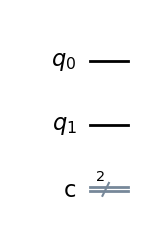

In [3]:
# Create simple quantum circuit

qb = 2      # number of quantum bits
cb = 2      # number of classical bits

qc = QuantumCircuit(qb, cb)

qc.draw('mpl')

#### Hadamard gates 

- Hadamard gates are used to transform a 'collapsed' state into a superposition of all possible states
- Mathematical reasoning for our simple circuit (2 quits, two classical bits):

$$ \bold{H}| \vec{0} \rangle = \frac{| \vec{0} \rangle + | \vec{1} \rangle}{\sqrt{2}}$$

$$ \bold{H}| \vec{1} \rangle = \frac{| \vec{0} \rangle - | \vec{1} \rangle}{\sqrt{2}}$$

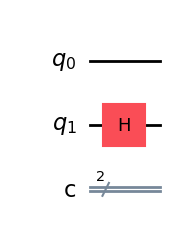

In [4]:
# Apply the Hadamard gate to the 2nd qubit of the quantum circuit
qc.h(1)
qc.draw('mpl')

#### Condition for a quantum operator: It should be **Unitary**
- Can create a unitary matrix  as follows

$$ U = \sum_{i}{[\text{next state}][\text{previous state}]^T} $$

##### Problem
- Implement the Pauli-X gate as a unitary operator on the first qubit of `qc`
- Visualize the modified quantum circuit

Notes:
- Matrix representation of the Pauli-X gate
$$ 
  \bf{\sigma_x} = \begin{bmatrix}

        0 & 1 \\ 1 & 0

    \end{bmatrix} 
$$

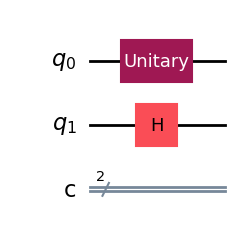

In [5]:
X_mat = [[0, 1], [1, 0]]        # Define Unitary matrix
PauliX = Operator(X_mat)        # Construct an operator
qc.unitary(PauliX, 0)           # Apply the operator
qc.draw('mpl')

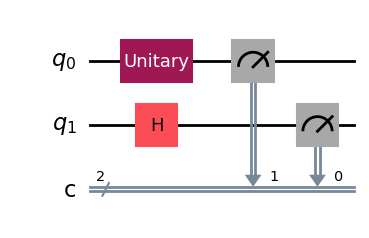

In [6]:
# Measure the quantum circuit to obtain information
qc.measure([0,1],[1,0])
qc.draw('mpl')

# Task 1
- Simulate your quantum circuit using 2048 shots
- Plot the results as a histogram

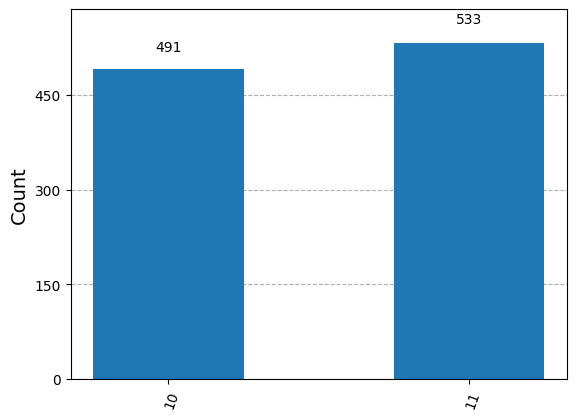

In [7]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shot=2048).result()
counts = result.get_counts()
plot_histogram(counts)

# Task 2
Construct an 8x8 unitary matrix for a 3-qubit system
- Assign the first qubit to `coin toss`
- Assign last two qubits to the state of the quantum walker

Notes
- The state of the quantum circuit is defined as...
    $$ |q_\text{walker}\rangle \otimes |q_\text{coin}\rangle$$ 
- We end up with the following unitary matrix:
  $$ \begin{bmatrix}

    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 

  \end{bmatrix} $$

In [8]:
# Define the unitary operator
U_mat = np.zeros((8,8))

# Set the 'requsite' elements to 1
U_mat[0][2] = 1
U_mat[1][1] = 1
U_mat[2][4] = 1
U_mat[3][6] = 1
U_mat[4][3] = 1
U_mat[5][7] = 1
U_mat[6][0] = 1
U_mat[7][5] = 1

# Define the Unitary Operator
U = Operator(U_mat)

# Task 3
Construct and simulate a quantum circuit that implements a single step of the quantum random walk
- qubit with index `0` will be used to simulate a coin toss 
- qubits at indices `1` and `2` will be used to identify the state of the quantum walker

Hint:
- Apply a Hadamard gate to create a quantum coin flip
- Apply the `U` operator to simulate the next state of the quantum walker
- Make sure you measure the qubits and visualize the circuit to confirm your quantum circuit is the one we are looking for

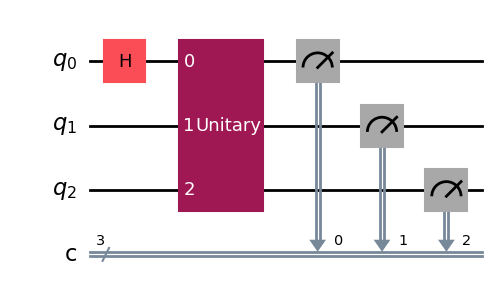

In [19]:
qrw = QuantumCircuit(3,3)

qrw.h(0)   # apply the Hadamard gate to the first qubit
qrw.unitary(U, range(3))

qrw.measure(range(3), range(3))
qrw.draw('mpl')

# Task 4
Create a function `dict3_to_dict2()` that...
- takes the dictionary of simulation results as input
- outputs a dictionary of the states of the quantum random walker

Note: We will use the new dictionary to visualize the state of the quantum walker using the histogram method

In [10]:
def dict3_to_dict2(counts):
    counts_refined = {'00':0, '01':0, '10':0, '11':0}
    
    for i in counts:
        if i[1:3] == '00':
            counts_refined['00'] += counts[i]
        elif i[1:3] == '01':
            counts_refined['01'] += counts[i]
        elif i[1:3] == '10':
            counts_refined['10'] += counts[i]
        else:
            counts_refined['11'] += counts[i]
    return counts_refined


# Task 5
Create a function `dict2_to_state2()` 
- Input: dictionary of simulation results
- Output: state vector of the quantum random walker

Hint:
- Create a vector of length `4`. Here is where you will store the results so that the array index corresponds to a node
  - E.g., The index `2` should correspond to node `10` on the graph
- Save the counts from the dictionary at the appropriate index
- Make sure you normalize. You can do this by scalar multiplying 1/(sqrt(sum(array elements^2)))
    $$ \hat{\mathbf{v}} = \frac{1}{\sqrt{\sum{v_i^2}}} \mathbf{v}$$

In [11]:
def dict3_to_state2(counts):
    counts_refined = [0, 0, 0 ,0]
    
    for idx in counts:
        if idx[1:3] == '00':
            counts_refined[0] += counts[idx]
        elif idx[1:3] == '01':
            counts_refined[1] += counts[idx]
        elif idx[1:3] == '10':
            counts_refined[2] += counts[idx]
        else:
            counts_refined[3] += counts[idx]
    return counts_refined/np.sqrt(np.sum(np.square(counts_refined)))
        

# Task 7
Create the `step()` function

In [12]:
def step(state, U, N):
    counts_arr = []
    qrw_circ = QuantumCircuit(3,3)
    qrw_circ.initialize(state, [1,2])
    
    for _ in range(N):
        qrw_circ.h(0)
        qrw_circ.unitary(U, range(3))
        
    qrw_circ.measure(range(3), range(3))
    
    return qrw_circ

# Task 8
Create a function `quantum_random_walk()` that generates the quantum random walk.
- Parameters:
  - `state`: the initial state of the quantum circuit
  - `U`: the unitary matrix
  - `N`: the number of steps
  - `backend`: the backend simulator for running the quantum circuit
- Return values:
  - `count_arr`: an array of counts (saves the simulation results of each step)
  - `count_dict`: a dictionary of counts (saves the simulation results of the walker)

Hints:
- Use `step()` to implement a single step of the quantum random walk
- Use `dict3_to_dict2()` and `dict3_to_state2()` to obtain data for the simulation results

In [13]:
def quantum_random_walk(state, U, N, backend):
    counts_arr = []
    counts_dict = []
    
    for i in range(N):
        qrw_circ = step(state, U, i)
        qrw_result = execute(qrw_circ, backend, shots=2048).result()
        qrw_counts = qrw_result.get_counts()
        
        counts_arr.append(dict3_to_state2(qrw_counts))
        counts_dict.append(dict3_to_dict2(qrw_counts))
    
    return counts_arr, counts_dict

# Task 7
Run the `quantum_random_walk()` function. Make sure to...
- Implement `N=10` steps
- Use `[1, 0, 0 ,0]` as the initial state
- Save your results as `counts_arr` and `counts_dict`

In [14]:
backend = Aer.get_backend('aer_simulator')
N = 10
initial_state = [1, 0, 0, 0]

counts_arr, counts_dict = quantum_random_walk(initial_state, U, N, backend)

# Task 8
Visualize the results

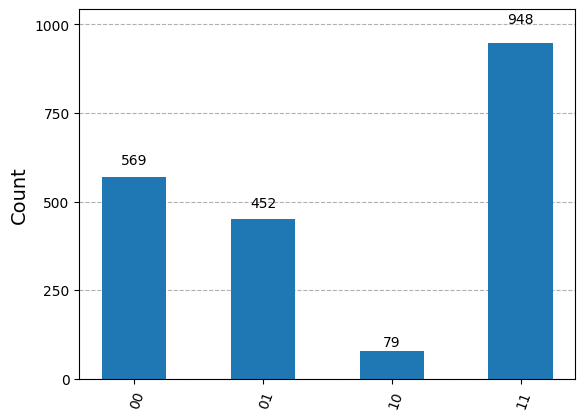

In [16]:
from time import sleep
fig, ax = plt.subplots()

for i in range(10):
    ax.clear()
    plot_histogram(counts_dict[i], ax=ax)
    display(fig)
    sleep(1)
    clear_output()

In [ ]:
qrw_circ.save_unitary()

simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qrw_circ).result()
unitary = result.get_unitary(qrw_circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))



Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-168 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.Circuit circuit-168 contains invalid parameters  for "statevector" method.


QiskitError: 'Data for experiment "circuit-168" could not be found.'